<a href="https://colab.research.google.com/github/mmaithani/Kaggle-Projects/blob/master/global_wheat_head_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [69]:
 ! pip install -q kaggle
#  ! pip install --upgrade kaggle

In [70]:
 ! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


### copy kaggle api in kaggle directory

In [71]:
! cp /kaggle.json ~/.kaggle/

In [72]:
! chmod 600 ~/.kaggle/kaggle.json

In [73]:
# check kaggle api
! kaggle datasets list

ref                                                           title                                                size  lastUpdated          downloadCount  
------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
allen-institute-for-ai/CORD-19-research-challenge             COVID-19 Open Research Dataset Challenge (CORD-19)    3GB  2020-07-06 18:49:31          87290  
roche-data-science-coalition/uncover                          UNCOVER COVID-19 Challenge                          179MB  2020-05-21 18:57:53          15270  
oleksastepaniuk/prozorro-public-procurement-dataset           ProZorro. Ukrainian public procurement dataset      448MB  2020-04-15 17:09:37             36  
navinmundhra/daily-power-generation-in-india-20172020         Daily Power Generation in India (2017-2020)          63KB  2020-06-29 17:13:29            345  
mrmorj/data-police-shootings                        

## two directories for data and images

In [ ]:
! mkdir /content/dataset
! kaggle competitions download -c 'global-wheat-detection' -p '/content/dataset'

In [ ]:
! mkdir /content/images
! kaggle competitions download -c 'global-wheat-detection' -p '/content/images'

In [ ]:
os.listdir('/content')

['.config',
 'train.csv.zip',
 'sample_submission.csv',
 '.ipynb_checkpoints',
 'sample_data']

In [ ]:
# !rm   'cb8d261a3.jpg' 'aac893a91.jpg'

In [ ]:
! unzip /content/train.csv.zip

Archive:  /content/train.csv.zip
  inflating: train.csv               


In [75]:
train=pd.read_csv('train.csv')
sampple_output = pd.read_csv('sample_submission.csv')

In [76]:
train.tail(20)

,image_id,width,height,bbox,source
147773,e6b5e296d,1024,1024,"[248.0, 303.0, 130.0, 107.0]",arvalis_2
147774,5e0747034,1024,1024,"[273.0, 284.0, 113.0, 92.0]",arvalis_2
147775,5e0747034,1024,1024,"[494.0, 125.0, 105.0, 92.0]",arvalis_2
147776,5e0747034,1024,1024,"[412.0, 220.0, 115.0, 97.0]",arvalis_2
147777,5e0747034,1024,1024,"[332.0, 404.0, 131.0, 87.0]",arvalis_2
147778,5e0747034,1024,1024,"[289.0, 742.0, 87.0, 72.0]",arvalis_2
147779,5e0747034,1024,1024,"[775.0, 586.0, 72.0, 56.0]",arvalis_2
147780,5e0747034,1024,1024,"[389.0, 927.0, 180.0, 97.0]",arvalis_2
147781,5e0747034,1024,1024,"[673.0, 337.0, 79.0, 95.0]",arvalis_2
147782,5e0747034,1024,1024,"[911.0, 243.0, 110.0, 79.0]",arvalis_2


In [77]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147793 entries, 0 to 147792
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   image_id  147793 non-null  object
 1   width     147793 non-null  int64 
 2   height    147793 non-null  int64 
 3   bbox      147793 non-null  object
 4   source    147793 non-null  object
dtypes: int64(2), object(3)
memory usage: 5.6+ MB


In [78]:
sampple_output.tail()

,image_id,PredictionString
5,348a992bb,1.0 0 0 50 50
6,cc3532ff6,1.0 0 0 50 50
7,2fd875eaa,1.0 0 0 50 50
8,cb8d261a3,1.0 0 0 50 50
9,53f253011,1.0 0 0 50 50


In [98]:
# Load an color image in grayscale
img = cv2.imread('/content/images/01189a3c3.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

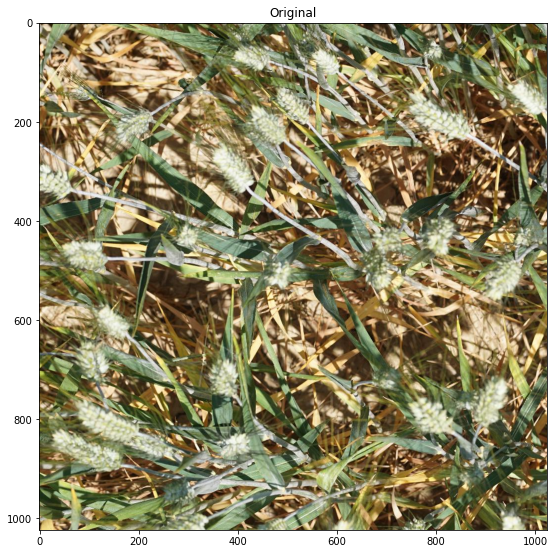

In [99]:
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(img)